### Contents

##### 1 Import Libraries and Data

##### 2 Regional Segementation

##### 3 Exclude low-activity customers

##### 4 Customer profiles

##### 5 Profile Visuals

##### 6 Descriptive stats profiles

##### 7 Regional Profile Visuals

##### 8 Visualizing profile differences in department preferences

##### 9 Investigative Crosstabs



#01 Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import path and csv files
path= r'/Users/owner/Documents/05_2023_Instacart_Basket_Analysis'

In [3]:
#Import final instacart file
df = pd.read_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'insta_merged.pkl' ))

In [4]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [5]:
crosstab.to_clipboard()

In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Price_Label', 'Busiest Days',
       'busiest_period_of_day', 'max_value', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'orders_hour_of_day ',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'fam_status', 'income'],
      dtype='object')

In [7]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,orders_hour_of_day,gender,state,age,date_joined,number_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,8,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,7,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,12,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,7,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,15,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
df.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
orders_hour_of_day              0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
Price_Label                     0
Busiest Days                    0
busiest_period_of_day           0
max_value                       0
loyalty_flag                    0
mean_price                      0
spending_flag                   0
median_days                     5
frequency_flag                  5
orders_hour_of_day              0
gender                          0
state                           0
age                             0
date_joined                     0
number_dependants               0
fam_status                      0
income        

In [9]:
#Create dataframe with missing data (median days and frequency flags) 
df_nan=df[df['median_days'].isnull()==True]

In [10]:
#Checking the number of orders for this user_id
df_2 = df[df['user_id'] == '159838']
df_2

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,orders_hour_of_day,gender,state,age,date_joined,number_dependants,fam_status,income
32377906,895835,159838,1,0,17,NaN,10749,3,0,Organic Red Bell Pepper,...,NaN,NaN,17,Male,Arkansas,63,11/9/2018,3,married,140994
32377907,895835,159838,1,0,17,NaN,33401,6,0,Goat Cheese Crumbles,...,NaN,NaN,17,Male,Arkansas,63,11/9/2018,3,married,140994
32377908,895835,159838,1,0,17,NaN,23695,2,0,California Veggie Burger,...,NaN,NaN,17,Male,Arkansas,63,11/9/2018,3,married,140994
32377909,895835,159838,1,0,17,NaN,21334,5,0,Organic Peeled Garlic,...,NaN,NaN,17,Male,Arkansas,63,11/9/2018,3,married,140994
32377910,895835,159838,1,0,17,NaN,22198,1,0,4X Ultra Concentrated Natural Laundry Detergen...,...,NaN,NaN,17,Male,Arkansas,63,11/9/2018,3,married,140994


In [11]:
# User has only 1 order,  median value should be 1, and the order_freq_flag is 'Non-frequent customer'
df.fillna({'median_days':1,'frequency_flag':'Non-frequent customer'}, inplace=True)

In [12]:
df.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
orders_hour_of_day              0
days_since_prior_order    2076096
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
Price_Label                     0
Busiest Days                    0
busiest_period_of_day           0
max_value                       0
loyalty_flag                    0
mean_price                      0
spending_flag                   0
median_days                     0
frequency_flag                  0
orders_hour_of_day              0
gender                          0
state                           0
age                             0
date_joined                     0
number_dependants               0
fam_status                      0
income        

#2- The first name and surname of each customer was removed for security reasons. There are no other PII implications to consider.

#3. Regional Segmentation

In [13]:
# Divide States into regions 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South= ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West= ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
#Fill in region column
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [15]:
df['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
#Compare spending habits between regions using crosstab
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna=False)
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In all regions, 98% of instacart shoppers are low spenders and the other 2% are high spenders. In conclusion, there is NO difference in spending habits between the different regions in the U.S.

#4. Exclude low-activity customers

In [17]:
df_drop = df[df['max_value']>=5]

In [19]:
df_drop.shape

(30964564, 31)

#5. Customer profiles

In [20]:
#Import dept_id csv
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Departments.csv'))

In [23]:
df_dept.shape

(21, 2)

In [24]:
# Rename unnamed column to 'department_id'
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [25]:
df_merged = df_drop.merge(df_dept, on = ['department_id'], indicator=True)

In [26]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_dependants,fam_status,income,region,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages,both


In [27]:
df_merged.shape

(30964564, 33)

In [28]:
df_merged['max_value'].describe()

count    3.096456e+07
mean     3.442569e+01
std      2.489504e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_value, dtype: float64

In [29]:
#Age profile
#Check the descriptive statistics for age variable
df_merged['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [30]:
# Create age_group classification
df_merged.loc[(df_merged['age'] < 35), 'age_group'] = 'Young Adult'
df_merged.loc[(df_merged['age'] >= 35) & (df_merged['age'] < 65), 'age_group'] = 'Middle-Aged'
df_merged.loc[df_merged['age'] >= 65, 'age_group'] = 'Senior'

In [31]:
df_merged.shape

(30964564, 34)

In [32]:
df_merged['age_group'].value_counts()

Middle-Aged    14526725
Young Adult     8242295
Senior          8195544
Name: age_group, dtype: int64

In [33]:
#Income profile (descriptive stat)
df_merged['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

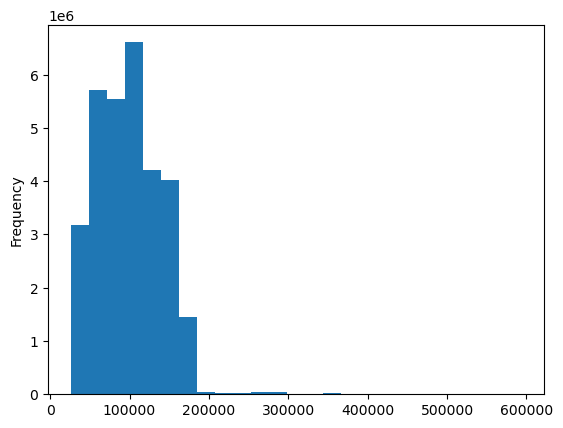

In [45]:
hist_cust_income = df_merged['income'].plot.hist(bins = 25)

-Income distribution ranges from 25k USD to 593K USD. The average income of 99k USD, Most of the customers fall within the 25k to 175k USD range. 

-Customers will be classified as follows:

-025-75k: >75k 

-75-125k: 75k - 125k 

-125k+: 125k - 593k

In [35]:
# Create income_group classification
df_merged.loc[(df_merged['income'] < 75000), 'income_group'] = '025-75k'
df_merged.loc[(df_merged['income'] >= 75000) & (df_merged['income'] < 125000), 'income_group'] = '075-125k'
df_merged.loc[(df_merged['income'] >= 125000), 'income_group'] = '125k+'

In [36]:
# Check the 'income_group' counts
df_merged['income_group'].value_counts(dropna = False)

075-125k    12779840
025-75k      9906680
125k+        8278044
Name: income_group, dtype: int64

In [37]:
df_merged.shape

(30964564, 35)

In [38]:
# Family/dependants profile
df_merged['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

In [39]:
#Crosstab between number_dependants and family_status
family_crosstab = pd.crosstab(df_merged['fam_status'], df_merged['number_dependants'], dropna = False)
family_crosstab

number_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


-According to the family crosstab, there are no single, divorced, or widowed adults with dependants. The family status is classified based on the number of dependants.

-No dependants: 0 dependants -Has dependants: 1+ dependants

In [40]:
# Create family_status profile
df_merged.loc[(df_merged['number_dependants'] == 0), 'dependants'] = 'No dependants'
df_merged.loc[(df_merged['number_dependants'] >= 1), 'dependants'] = 'Has dependants'

In [41]:
# Check  'dependants' counts
df_merged['dependants'].value_counts(dropna = False)

Has dependants    23224883
No dependants      7739681
Name: dependants, dtype: int64

In [42]:
df_merged.shape

(30964564, 36)

In [43]:
# Create diet choice profile
diet_crosstab = pd.crosstab(df_merged['department_id'], df_merged['user_id'], dropna = False)
diet_crosstab

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,0,12,...,1,13,16,4,9,12,7,51,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,2,1,56,8,17,1,0,2,...,0,1,0,2,4,7,2,4,0,7
4,5,72,10,34,340,51,393,0,0,14,...,1,196,78,4,22,68,10,20,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
6,0,1,0,0,2,1,24,0,0,3,...,0,0,1,2,0,0,0,1,0,1
7,13,0,0,19,36,1,55,2,14,15,...,0,0,3,10,25,13,3,6,0,7
8,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,38,1,9,0,4,8,...,1,2,4,8,0,1,2,0,0,37


In [46]:
# Assigning diet flags and storing 
diet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-eater'

In [47]:
# assigning user flags to the list
diet_list = []
for user in df_merged['user_id']:
    diet_list.append(diet_dict[user])

In [48]:
#Adding 'diet_style' column to df_drop_customers
df_merged['diet_style'] = diet_list

In [49]:
df_merged.shape

(30964564, 37)

In [50]:
df_merged['diet_style'].value_counts()

Meat-eater    23065332
Vegetarian     7589236
Vegan           309996
Name: diet_style, dtype: int64

In [55]:
df_merged['max_value'].describe()

count    3.096456e+07
mean     3.442569e+01
std      2.489504e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_value, dtype: float64

#export 

In [52]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Ords_prods_profiles.pkl'))

#5. Profile Visuals

In [56]:
# create abbreviated profile dataframe
df_profile = df_merged [['user_id', 
                          'age',
                          'age_group', 
                          'income_group', 
                          'dependants', 
                          'department', 
                          'diet_style', 
                          'region', 
                          'loyalty_flag', 
                          'spending_flag', 
                          'mean_price', 
                          'frequency_flag', 
                          'reordered' ,
                          'fam_status']]

In [57]:
# no duplicate user_ids
df_customer = df_profile.drop_duplicates(subset = ["user_id"])

In [58]:
df_customer.shape

(162631, 14)

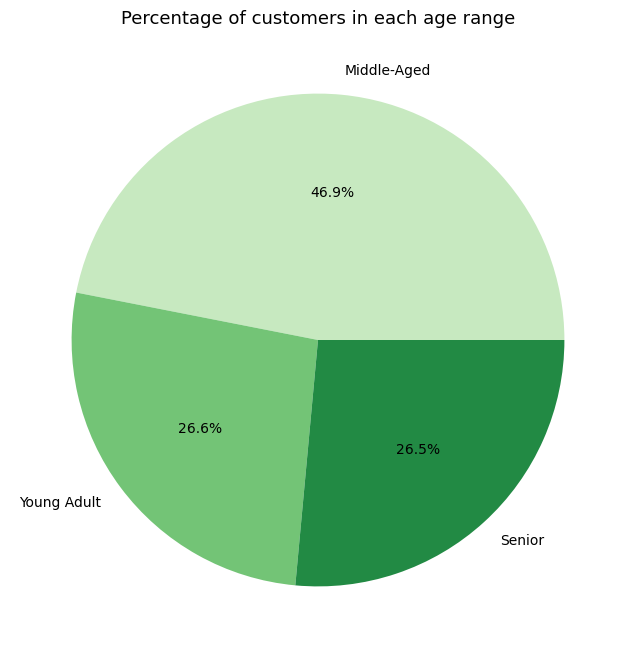

In [95]:
# Age Flag Visualization
pie_user_age = df_profile['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Greens', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customers in each age range',fontsize=13)
plt.show()

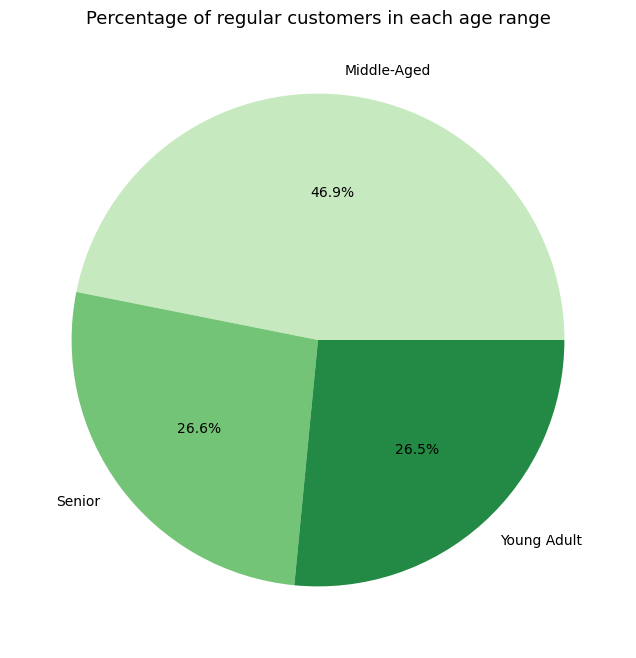

In [94]:
# Age Flag Visualization
pie_user_age = df_customer['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Greens', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers in each age range',fontsize=13)
plt.show()

In [61]:
#Create viz_path
viz_path=r'/Users/owner/Documents/05_2023_Instacart_Basket_Analysis/04 Analysis/Visualizations'

In [62]:
pie_user_age.figure.savefig(os.path.join(viz_path, 'pie_user_age'))

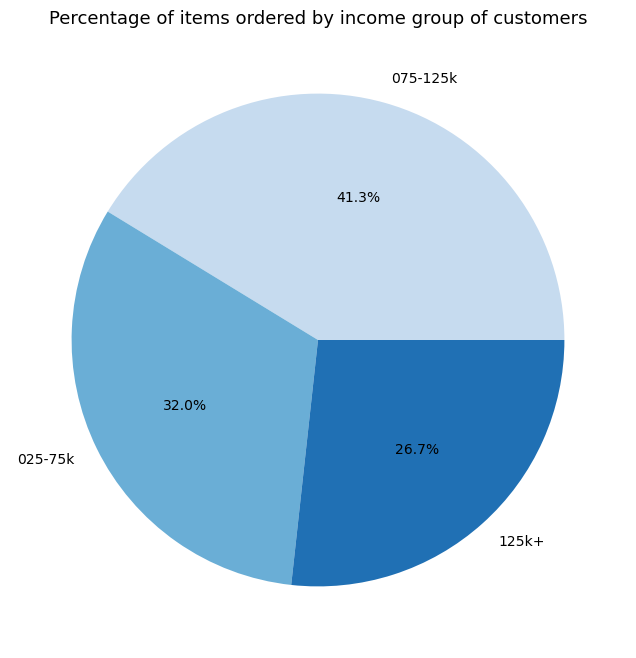

In [65]:
#Pie chart of percentage of items ordered by income group
pie_orders_income = df_profile['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by income group of customers',fontsize=13)
plt.show()

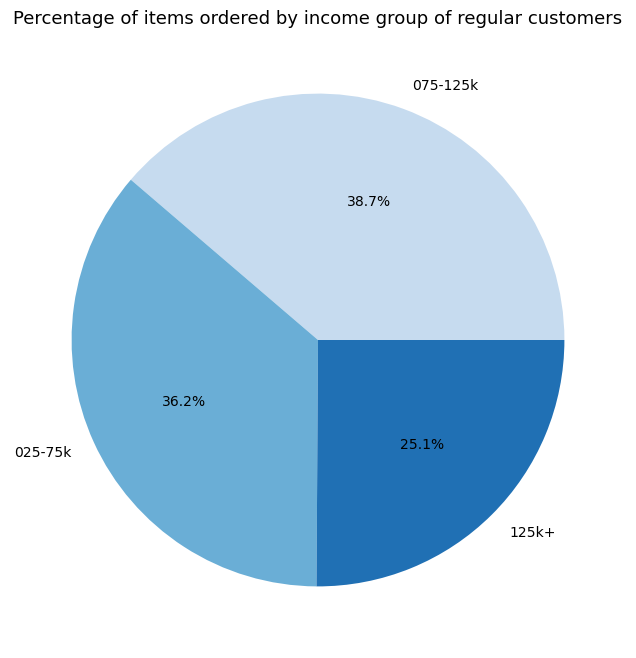

In [93]:
#Pie chart of percentage of items ordered by income group
pie_orders_income = df_customer['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by income group of regular customers',fontsize=13)
plt.show()

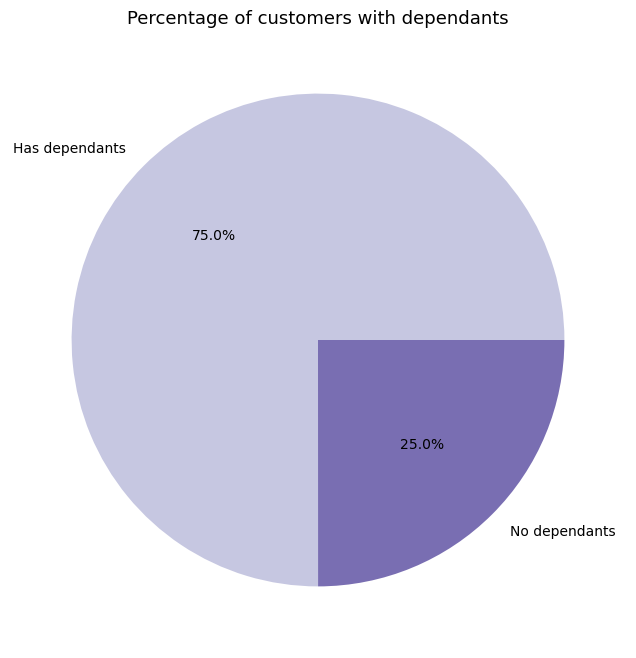

In [92]:
#Pie chart of customer with dependants
pie_user_dependants = df_profile['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                        colors = sns.color_palette('Purples', 2), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customers with dependants',fontsize=13)
plt.show()

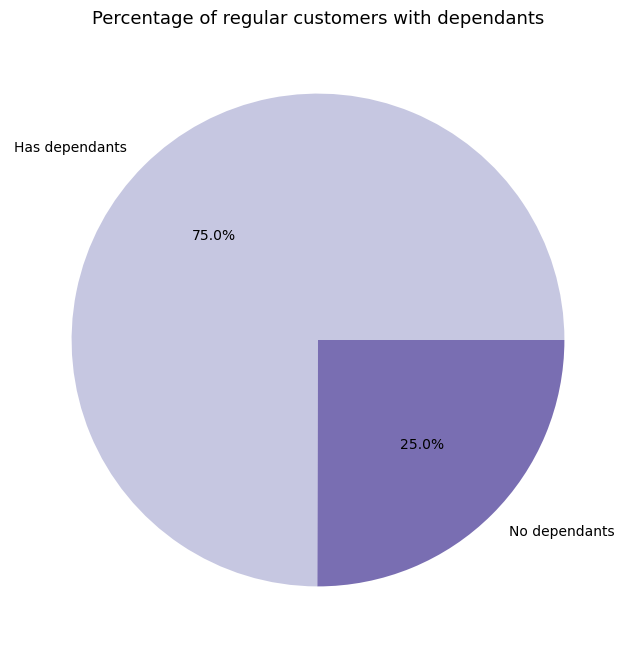

In [91]:
#Pie chart of customer with dependants
pie_user_dependants = df_customer['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                        colors = sns.color_palette('Purples', 2), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers with dependants',fontsize=13)
plt.show()

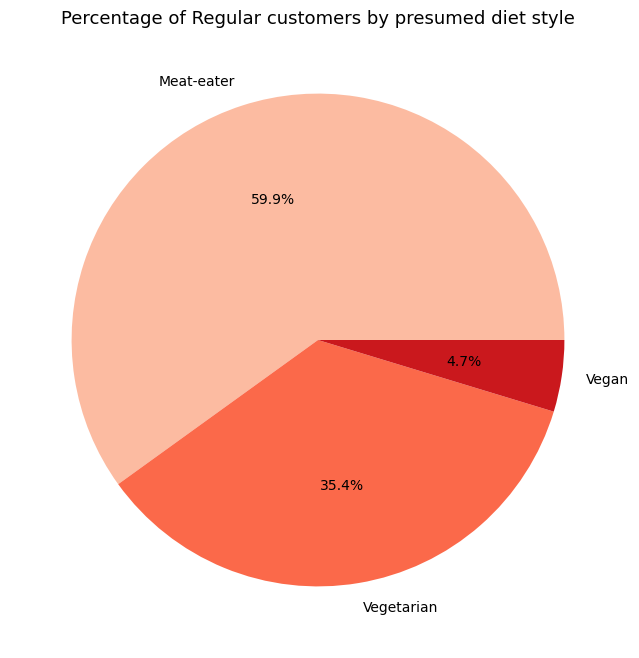

In [70]:
#Pie chart of customer's diet style based on previous buying history
pie_user_diet = df_customer['diet_style'].value_counts().plot.pie(figsize = (8,8), 
                                                                  colors = sns.color_palette('Reds', 3), 
                                                                  autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Regular customers by presumed diet style',fontsize=13)
plt.show()

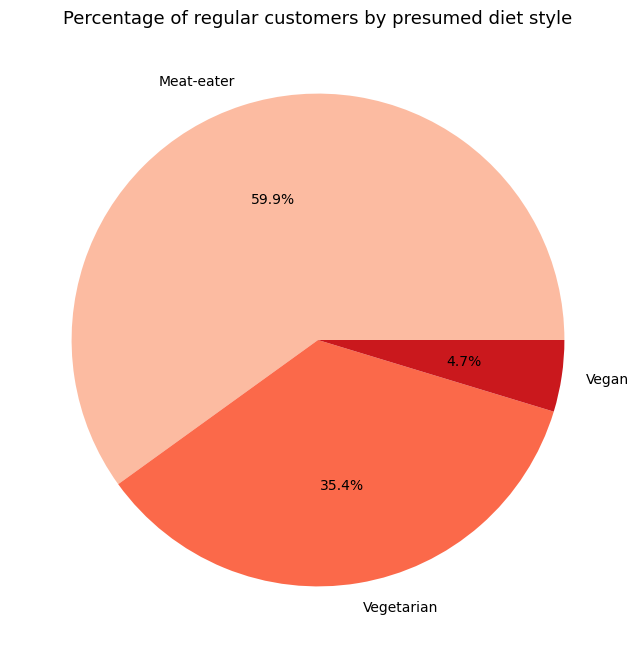

In [90]:
#Pie chart of customer's diet style based on previous buying history
pie_user_diet = df_customer['diet_style'].value_counts().plot.pie(figsize = (8,8), 
                                                                  colors = sns.color_palette('Reds', 3), 
                                                                  autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by presumed diet style',fontsize=13)
plt.show()

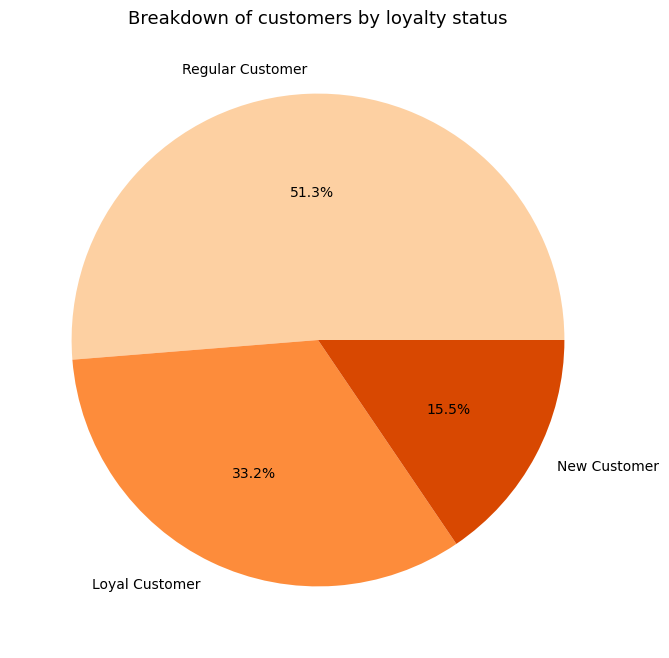

In [89]:
#Pie chart of customers by loyalty flag
pie_user_loyal = df_profile['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Oranges', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of customers by loyalty status',fontsize=13)
plt.show()

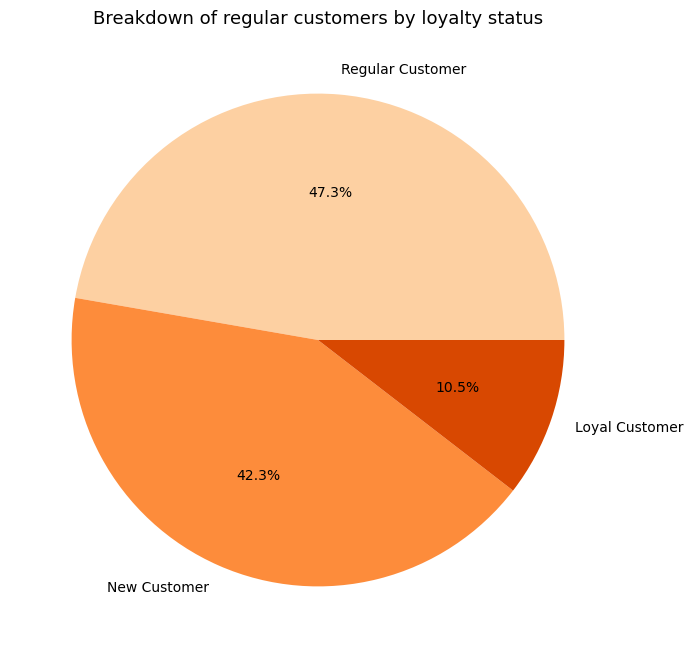

In [77]:
#Pie chart of customers by loyalty flag
pie_user_loyal = df_customer['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Oranges', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of regular customers by loyalty status',fontsize=13)
plt.show()

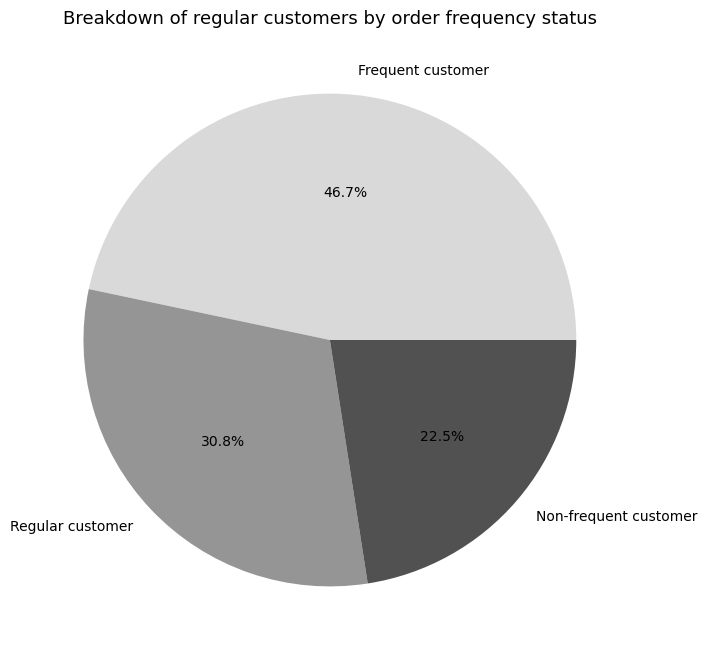

In [88]:
#Pie chart of customers by order frequency
pie_user_freq = df_customer['frequency_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = sns.color_palette('Greys', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of regular customers by order frequency status',fontsize=13)
plt.show()

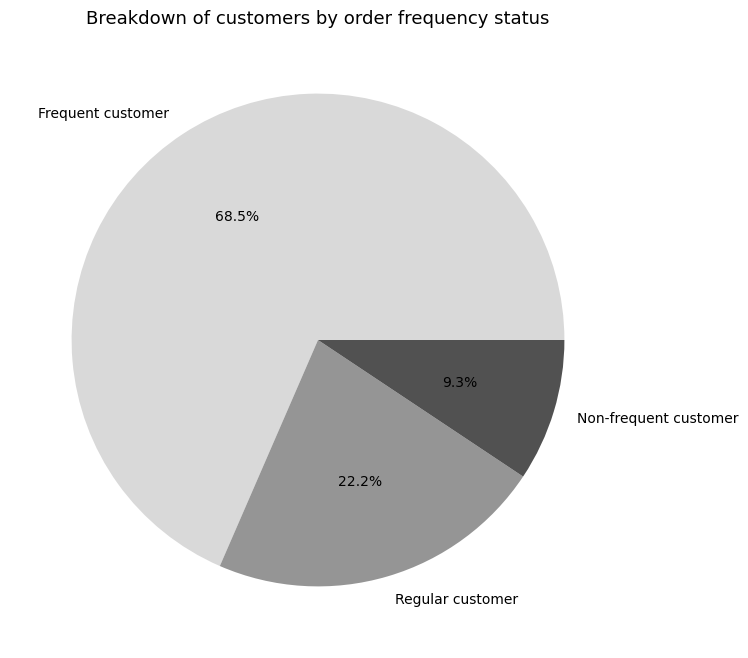

In [87]:
#Pie chart of customers by order frequency
pie_user_freq = df_profile['frequency_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = sns.color_palette('Greys', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of customers by order frequency status',fontsize=13)
plt.show()

#6. Descriptive stats of profiles

In [99]:
# Usage freq. and expenditure by Age groups
cross_age_orderhabits = df_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [100]:
cross_age_orderhabits

prices               days_since_prior_order           
                  mean  min      max                   mean  min   max
age_group                                                             
Middle-Aged  11.918942  1.0  99999.0              10.813115  0.0  30.0
Senior       11.757769  1.0  99999.0              10.791788  0.0  30.0
Young Adult  12.133971  1.0  99999.0              10.823742  0.0  30.0

In [101]:
# Usage freq. and expenditure by Income groups
cross_income_orderhabits = df_merged.groupby('income_group').agg({'prices': ['mean', 'min', 'max'], 
                                                                    'days_since_prior_order': ['mean', 'min', 'max']})

In [103]:
cross_income_orderhabits

prices               days_since_prior_order           
                   mean  min      max                   mean  min   max
income_group                                                           
025-75k        7.451187  1.0  14900.0              10.900972  0.0  30.0
075-125k       9.409825  1.0  99999.0              10.775873  0.0  30.0
125k+         21.193859  1.0  99999.0              10.755107  0.0  30.0

In [104]:
# Usage freq. and expenditure by customers with dependants and without
cross_family_orderhabits = df_merged.groupby('dependants').agg({'prices': ['mean', 'min', 'max'], 
                                                                  'days_since_prior_order': ['mean', 'min', 'max']})

In [105]:
cross_family_orderhabits

prices               days_since_prior_order           
                     mean  min      max                   mean  min   max
dependants                                                               
Has dependants  11.877156  1.0  99999.0              10.816416  0.0  30.0
No dependants   12.102657  1.0  99999.0              10.791951  0.0  30.0

In [106]:
# Usage freq. and expenditure by customers grouped by diet
cross_diet_orderhabits = df_merged.groupby('diet_style').agg({'prices': ['mean', 'min', 'max'], 
                                                                'days_since_prior_order': ['mean', 'min', 'max']})

In [107]:
cross_diet_orderhabits

prices               days_since_prior_order           
                 mean  min      max                   mean  min   max
diet_style                                                           
Meat-eater  11.995948  1.0  99999.0              10.561970  0.0  30.0
Vegan        6.957126  1.0     20.0              13.800485  0.0  30.0
Vegetarian  11.947061  1.0  99999.0              11.456935  0.0  30.0

#7. Regional Profile Visuals

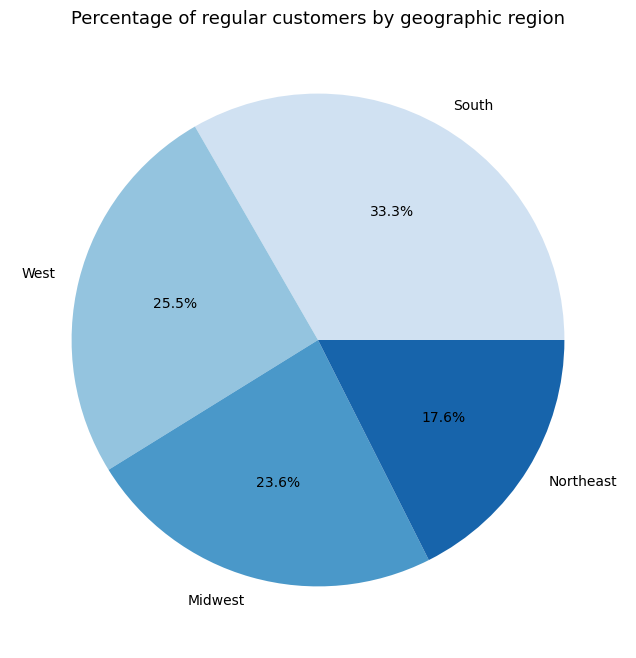

In [108]:
#Pie chart of percentage of regular customers in each region
pie_user_region = df_customer['region'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Blues', 4), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by geographic region',fontsize=13)
plt.show()

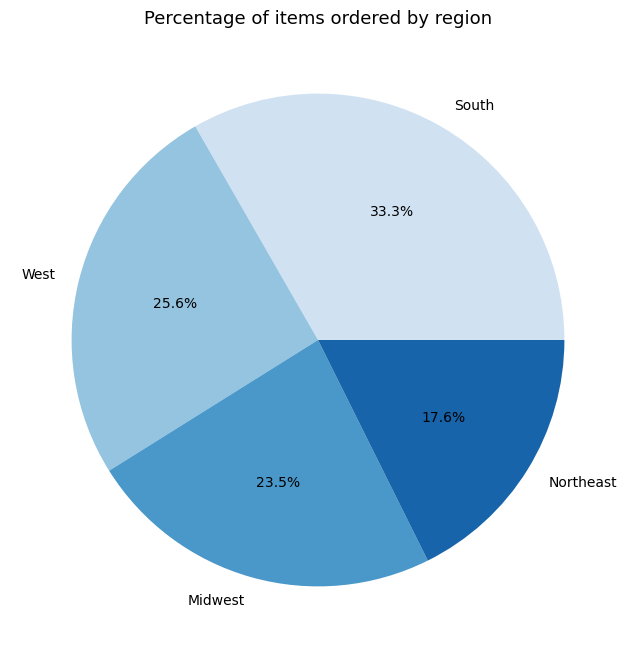

In [110]:
#Pie chart of percentage of items ordered by region
pie_orders_region = df_profile['region'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 4), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by region',fontsize=13)
plt.show()

In [123]:
# Do customers in different regions order at different rates?
#crosstab region and order_frequency flag - normalized
crosstab_regional_freq_n = pd.crosstab(index = df_profile['region'], 
                                         columns = df_profile['frequency_flag'], 
                                         normalize = 'index')

In [122]:
#second crosstab to put labels on chart
crosstab_regional_freq_2 = pd.crosstab(index = df_profile['region'], 
                                         columns = df_profile['frequency_flag'])

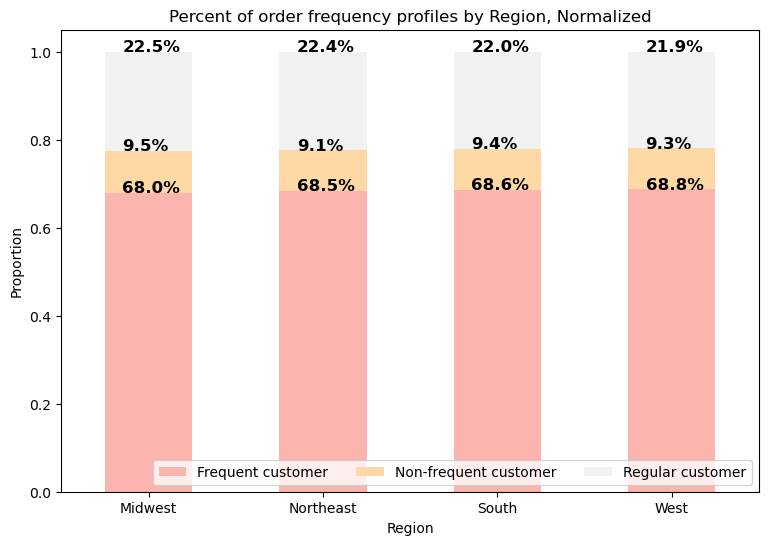

In [124]:
#Regional distribution of frequent customer profiles
bar_norm_region_freq = crosstab_regional_freq_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Pastel1',
                                                       figsize = (9, 6))
 
plt.title('Percent of order frequency profiles by Region, Normalized')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_regional_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_regional_freq_n.loc[x],
                                   crosstab_regional_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [119]:
#Are departments more frequently ordered from in different regions? 
#crosstab region and departments - normalized
crosstab_dept_region_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['region'], 
                                         normalize = 'index')

In [120]:
#second crosstab to put labels on chart
crosstab_dept_region_2 = pd.crosstab(index = df_profile['department'], columns = df_profile['region'])

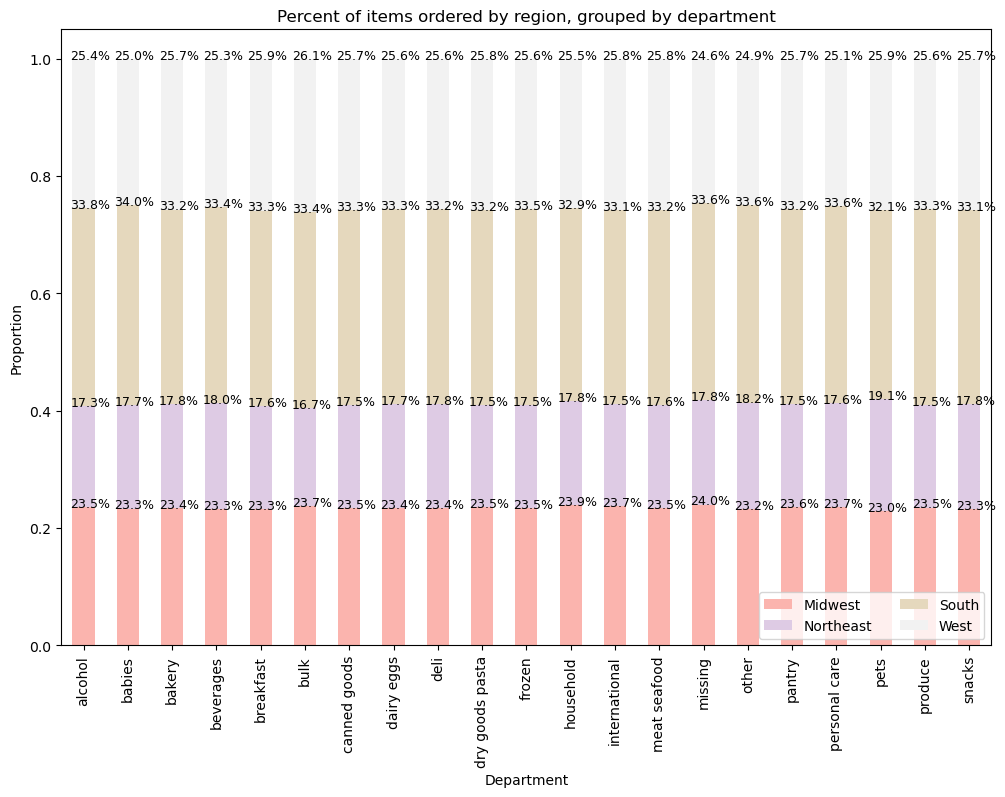

In [121]:
#Normalized bar chart of items ordered by region, grouped by department
bar_norm_dept_region = crosstab_dept_region_n.plot( kind ='bar',
                                                   stacked = True,
                                                   colormap = 'Pastel1',
                                                   figsize = (12, 8)) 
plt.title('Percent of items ordered by region, grouped by department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_region_n.loc[x],
                                   crosstab_dept_region_n.loc[x].cumsum()):    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9)
plt.show()

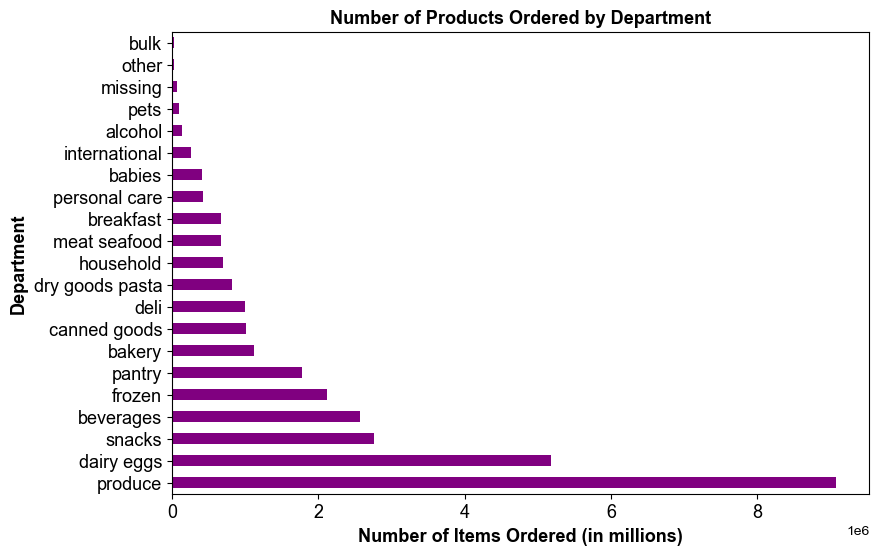

In [126]:
#Bar chart of departments by products ordered
bar_top_depts = df_merged['department'].value_counts().plot.barh(figsize = (9,6), color = ['purple'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Products Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [128]:
#average price per item sold by department
cross_dept_avgprice = df_merged.groupby('department').agg({'prices': ['mean']})

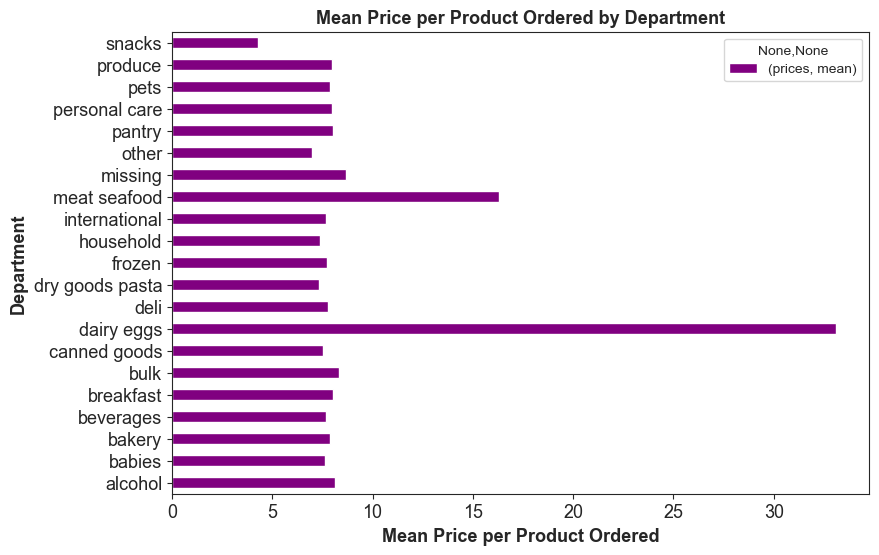

In [129]:
#Bar chart of average price per departments by products ordered
bar_dept_price = cross_dept_avgprice.plot.barh(figsize = (9,6), color = ['purple'])
sns.set_style('ticks')
plt.xlabel('Mean Price per Product Ordered', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Mean Price per Product Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [130]:
#Age profile
#crosstab department preferences and age groups  - normalized
crosstab_dept_age_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['age_group'], 
                                         normalize = 'index')

In [131]:
#second crosstab to put labels on chart
crosstab_dept_age_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['age_group'])

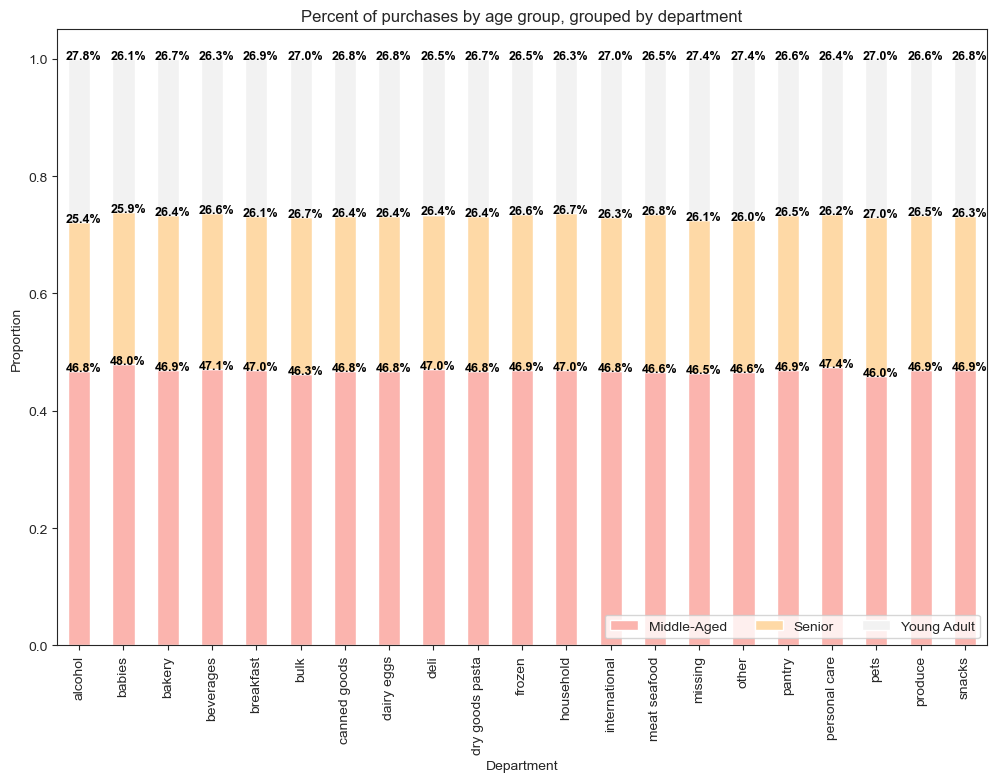

In [132]:
#Normalized bar chart of purchases by age group, grouped by department
bar_norm_dept_age = crosstab_dept_age_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'Pastel1',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by age group, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_age_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_age_n.loc[x],
                                   crosstab_dept_age_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [133]:
#Income profile
#crosstab department preferences and income groups  - normalized
crosstab_dept_income_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['income_group'], 
                                         normalize = 'index')

In [134]:
#second crosstab to put labels on chart
crosstab_dept_income_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['income_group'])

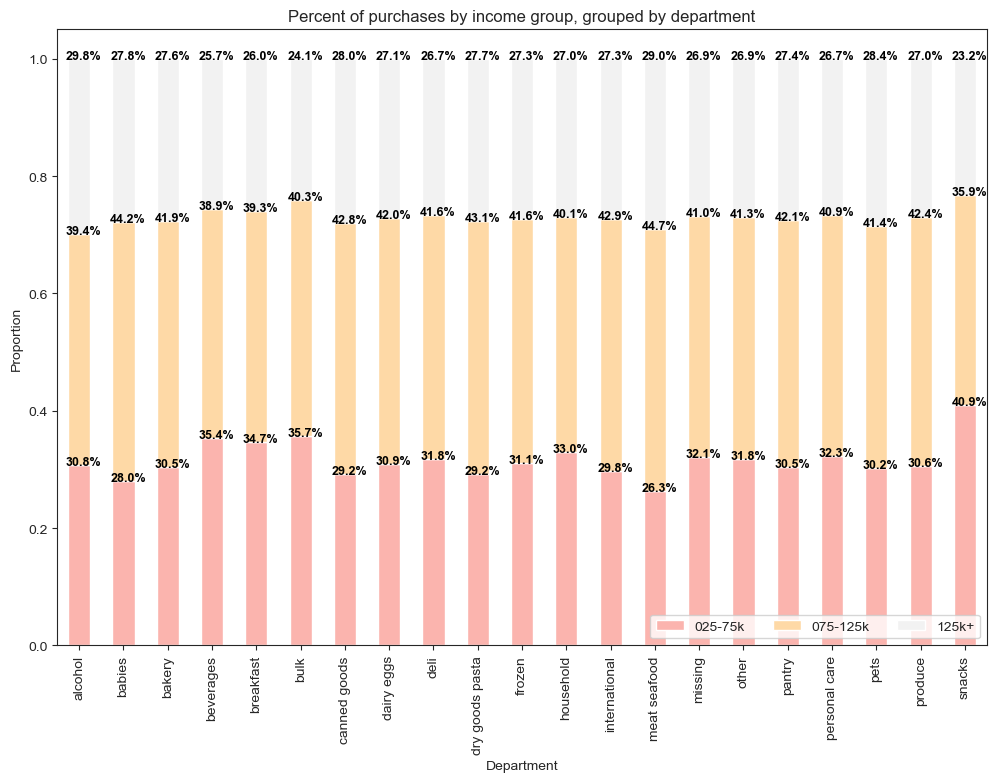

In [135]:
#Normalized bar chart of purchases by income group, grouped by department
bar_norm_dept_income = crosstab_dept_income_n.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'Pastel1',
                                                    figsize = (12, 8))
 
plt.title('Percent of purchases by income group, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_income_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_income_n.loc[x],
                                   crosstab_dept_income_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [136]:
#Family/dependant profile
#crosstab department preferences and dependant status groups  - normalized
crosstab_dept_parent_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['dependants'], 
                                         normalize = 'index')

In [137]:
#second crosstab to put labels on chart
crosstab_dept_parent_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['dependants'])

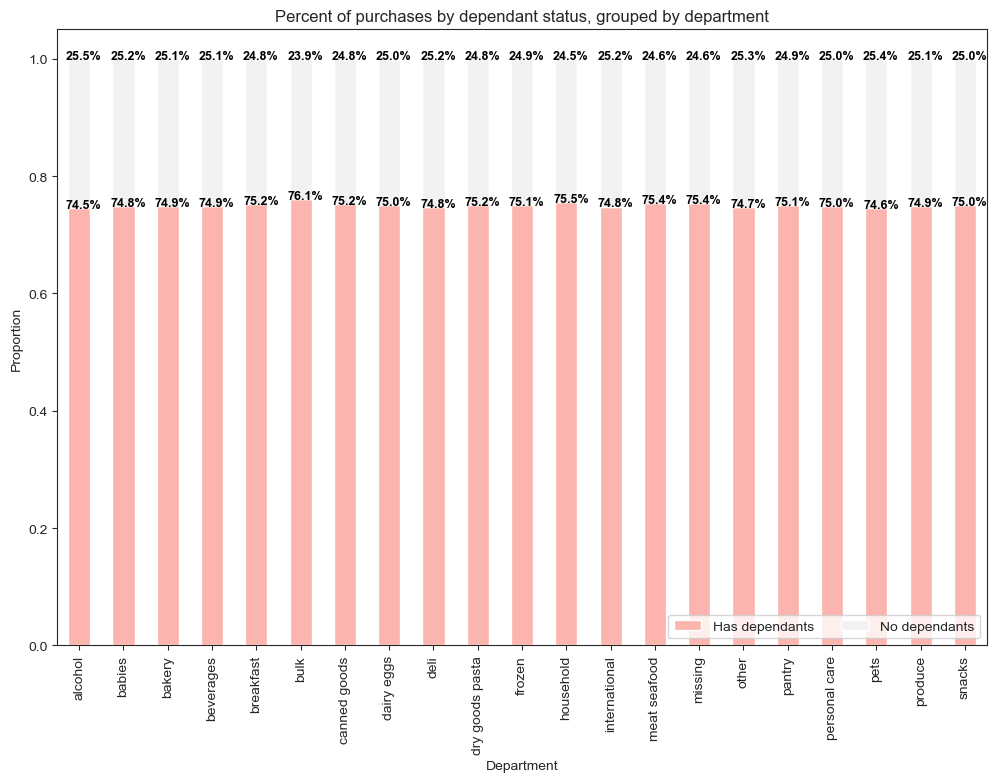

In [139]:
#Normalized bar chart of purchases by income group, grouped by department
bar_norm_dept_parent = crosstab_dept_parent_n.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'Pastel1',
                                                    figsize = (12, 8))
 
plt.title('Percent of purchases by dependant status, grouped by department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_parent_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_parent_n.loc[x],
                                   crosstab_dept_parent_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [140]:
#Diet profile
#crosstab department preferences and diet styles  - normalized
crosstab_dept_diet_n= pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['diet_style'], 
                                         normalize = 'index')

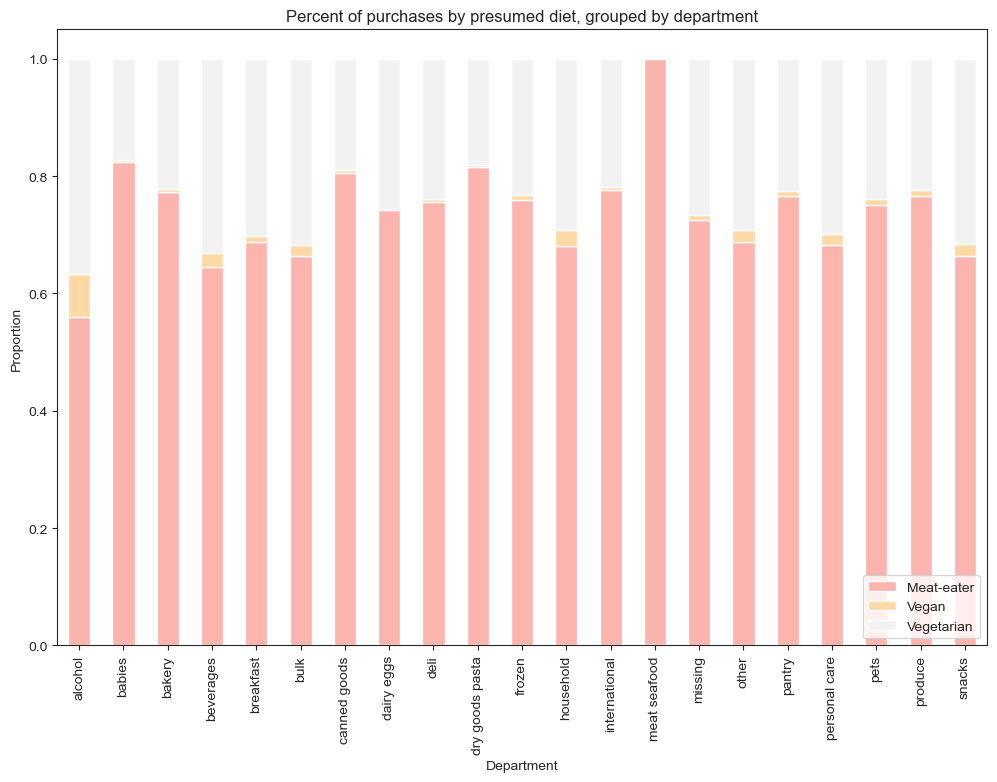

In [141]:
#Normalized bar chart of purchases by diet styles, grouped by department
bar_norm_dept_diet = crosstab_dept_diet_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'Pastel1',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by presumed diet, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

plt.show()

In [143]:
#Order frequency profile
#crosstab department and order_frequency flag - normalized
crosstab_dept_freq_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['frequency_flag'], 
                                         normalize = 'index')

In [144]:
#second crosstab to put labels on chart
crosstab_dept_freq_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['frequency_flag'])

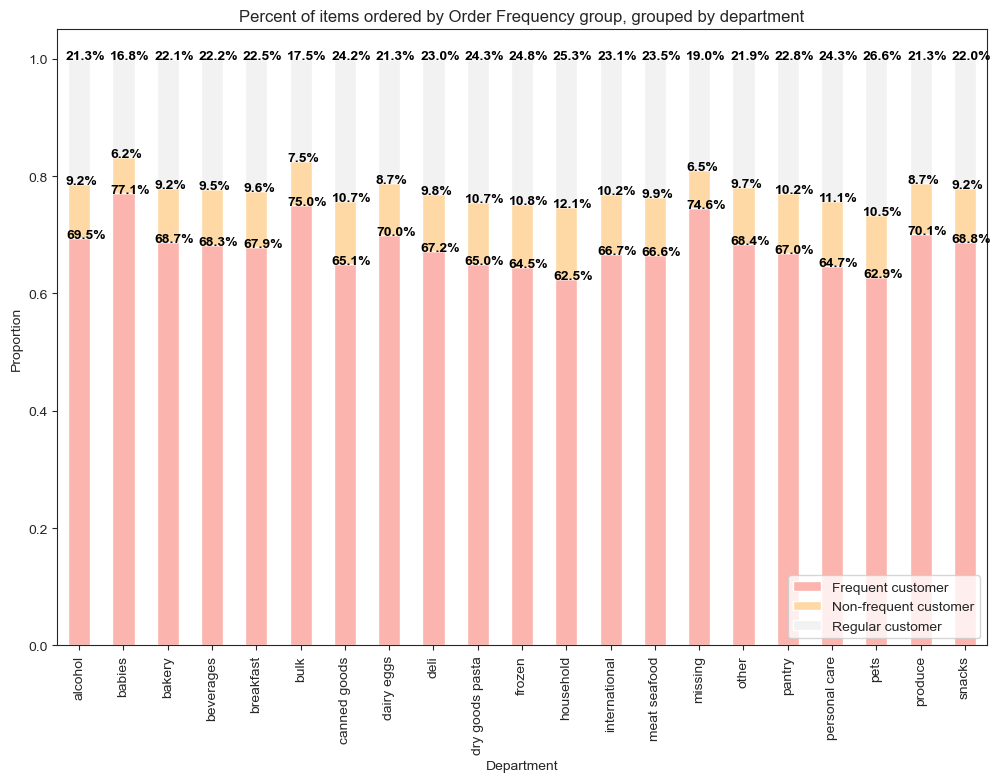

In [145]:
#Normalized bar chart of items ordered by order frquency group, grouped by department
bar_norm_dept_freq = crosstab_dept_freq_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'Pastel1',
                                                figsize = (12, 8))
 
plt.title('Percent of items ordered by Order Frequency group, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_freq_n.loc[x],
                                   crosstab_dept_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [146]:
#Loyalty flag profile
#crosstab region and loyal customer flag - normalized
crosstab_dept_loyal_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['loyalty_flag'], 
                                         normalize = 'index')

In [147]:
#second crosstab to put labels on chart
crosstab_dept_loyal_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['loyalty_flag'])

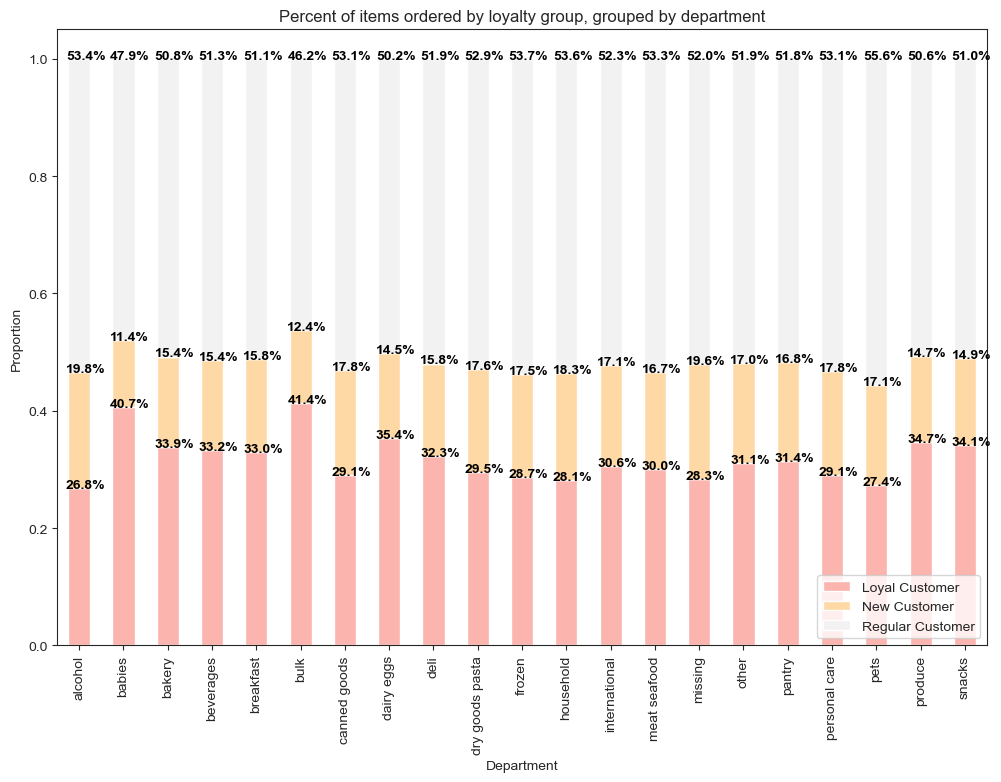

In [148]:
#Normalized bar chart of items ordered by loyalty group, grouped by department
bar_norm_dept_loyalty = crosstab_dept_loyal_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'Pastel1',
                                                figsize = (12, 8))
 
plt.title('Percent of items ordered by loyalty group, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_loyal_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_loyal_n.loc[x],
                                   crosstab_dept_loyal_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

#9. Crosstabs

In [153]:
# crosstab diet_style with income_group to determine if income may be affecting purchasing patterns
cross_income_diet = pd.crosstab(index = df_customer['diet_style'], 
                                    columns = df_customer['income_group'], 
                                    normalize = 'index')
cross_income_diet

income_group,025-75k,075-125k,125k+
diet_style,,,
Meat-eater,0.295020,0.428073,0.276907
Vegan,0.612574,0.237197,0.150229
Vegetarian,0.441558,0.338081,0.220361


In [156]:
#The average price per item is highest on day 0 and 6, what departments have the most orders each day? 
#crosstab departments and Orders per day- normalized
crosstab_dept_orders_n = pd.crosstab(index = df_merged['orders_day_of_week'], 
                                    columns = df_merged['department'], 
                                    normalize = 'index')
crosstab_dept_orders_n.to_clipboard

<bound method NDFrame.to_clipboard of department           alcohol    babies    bakery  beverages  breakfast  \
orders_day_of_week                                                       
0                   0.002738  0.013358  0.036292   0.069744   0.020227   
1                   0.003585  0.013063  0.035968   0.085547   0.022652   
2                   0.004776  0.013660  0.036056   0.088329   0.022519   
3                   0.005776  0.013825  0.036158   0.089902   0.022446   
4                   0.006846  0.013779  0.036241   0.089861   0.022357   
5                   0.006399  0.012363  0.036424   0.089424   0.022222   
6                   0.004195  0.012874  0.036271   0.075735   0.019824   

department              bulk  canned goods  dairy eggs      deli  \
orders_day_of_week                                                 
0                   0.001002      0.036561    0.164386  0.033778   
1                   0.001134      0.031453    0.169338  0.032607   
2                   0.0